In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Grab with regular SHIPS

basin = 'north_atlantic'

RI = pd.read_csv('/Users/acheung/data/RI_Cases/RI_Events_'+basin+'.csv')
RI["RI Start"] = pd.to_datetime(RI["RI Start"])
RI["RI End"] = pd.to_datetime(RI["RI End"])
SHIPS_shear = pd.read_csv('/Users/acheung/data/SHIPS/SHIPS_deep_layer_shear_'+basin+'.csv')
SHIPS_shear['Time'] = pd.to_datetime(SHIPS_shear['Time'])

all_shear_arrays = []
all_storm_ids = []
all_storm_times = []
for i in range(len(RI)):
    current_storm_shear = SHIPS_shear.where(SHIPS_shear['Storm_ID'] ==
                                            RI.iloc[[i]]['Storm_ID'].values[0]).dropna()
    # current_shear_RI = current_storm_shear.where(
    #     current_storm_shear['Time'] == RI.iloc[[i]]['RI Start']).dropna()['Deep_Layer_Shear'].values[0]
#     print(ATL_RI.iloc[[i]],current_shear_RI)
    # all_shears.append(current_shear_RI)
    current_storm_shear_indexed = current_storm_shear.set_index('Time')
    current_storm_shear_indexed.index = pd.to_datetime(current_storm_shear_indexed.index)
    # We call shear for 24 hours before RI, but sometimes we dont have data back that far if it was not a TC oficially
    shear_array = current_storm_shear_indexed.loc[(RI.iloc[[i]]['RI Start']+timedelta(hours = -24)).values[0]:RI.iloc[[i]]['RI End'].values[0]]
    all_shear_arrays.append(shear_array['Deep_Layer_Shear'].values)
    all_storm_ids.append(shear_array['Storm_ID'].values)
    all_storm_times.append(shear_array.index.values)
# RI.insert(6, "Deep-Layer Shear (kt)", all_shears)
# RI.to_csv("/Users/acheung/data/RI_Cases/RI_Events_with_shear_"+basin+".csv",index=False)

allshear_pandad = pd.DataFrame(np.concatenate(all_shear_arrays),index=[np.concatenate(all_storm_ids),np.concatenate(all_storm_times)],columns=['Deep-Layer Shear (kt)'])
allshear_pandad.to_csv("/Users/acheung/data/RI_Cases/RI_Events_with_shear_arrays_"+basin+".csv")

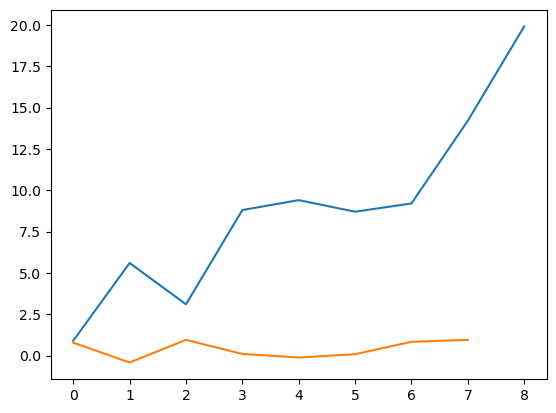

In [174]:
all_shear_arrays

from numpy import diff
dx = 6 # hours
diff(all_shear_arrays[0])/dx

plt.plot(all_shear_arrays[0])
plt.plot(diff(all_shear_arrays[0])/dx)


In [161]:
pd.set_option('display.max_rows', None)

allshear_pandad

Deep-Layer Shear (kt)
AL032000 2000-08-10 12:00:00                    0.9
         2000-08-10 18:00:00                    5.6
         2000-08-11 00:00:00                    3.1
         2000-08-11 06:00:00                    8.8
         2000-08-11 12:00:00                    9.4
         2000-08-11 18:00:00                    8.7
         2000-08-12 00:00:00                    9.2
         2000-08-12 06:00:00                   14.2
         2000-08-12 12:00:00                   19.9
AL072000 2000-08-19 18:00:00                    0.8
         2000-08-20 00:00:00                    2.5
         2000-08-20 06:00:00                   10.3
         2000-08-20 12:00:00                   13.1
         2000-08-20 18:00:00                    8.9
         2000-08-21 00:00:00                   14.4
         2000-08-21 06:00:00                   14.5
         2000-08-21 12:00:00                   13.2
AL102000 2000-09-10 18:00:00                    6.9
         2000-09-11 00:00:00                    8.1
         2000-09-11 06:00:00                   15.3
         2000-09-11 12:00:00                   18.0
         2000-09-11 18:00:00                   12.0
AL112000 2000-09-14 12:00:00                    7.8
         2000-09-14 18:00:00                    7.3
         2000-09-15 00:00:00                    9.6
         2000-09-15 06:00:00                   14.4
         2000-09-15 12:00:00                   17.9
         2000-09-15 18:00:00                   10.7
         2000-09-16 00:00:00                   17.7
         2000-09-16 06:00:00                   25.7
         2000-09-16 12:00:00                   21.7
         2000-09-16 18:00:00                   19.7
AL122000 2000-09-19 18:00:00                    7.5
         2000-09-20 00:00:00                    6.4
         2000-09-20 06:00:00                    8.7
         2000-09-20 12:00:00                   14.3
         2000-09-20 18:00:00                   12.6
         2000-09-21 00:00:00                   15.0
         2000-09-21 06:00:00                   19.9
         2000-09-21 12:00:00                   23.8
         2000-09-21 18:00:00                   24.9
AL132000 2000-09-21 18:00:00                   10.4
         2000-09-22 00:00:00                    7.6
         2000-09-22 06:00:00                    9.8
         2000-09-22 12:00:00                    9.4
         2000-09-22 18:00:00                    6.8
         2000-09-23 00:00:00                    8.5
         2000-09-23 06:00:00                    7.3
         2000-09-23 12:00:00                    5.6
         2000-09-23 18:00:00                    3.0
         2000-09-24 00:00:00                    3.9
AL142000 2000-09-25 12:00:00                    4.6
         2000-09-25 18:00:00                    6.0
         2000-09-26 00:00:00                    6.7
         2000-09-26 06:00:00                   11.2
         2000-09-26 12:00:00                    9.6
         2000-09-26 18:00:00                    9.1
         2000-09-27 00:00:00                    6.8
         2000-09-27 06:00:00                   11.0
         2000-09-27 12:00:00                   13.2
         2000-09-27 18:00:00                    8.8
AL152000 2000-09-28 18:00:00                    7.9
         2000-09-29 00:00:00                    7.0
         2000-09-29 06:00:00                   11.2
         2000-09-29 12:00:00                   11.0
         2000-09-29 18:00:00                    8.7
         2000-09-30 00:00:00                    9.6
         2000-09-30 06:00:00                    9.1
         2000-09-30 12:00:00                    8.4
         2000-09-30 18:00:00                    5.3
         2000-10-01 00:00:00                    2.6
         2000-10-01 06:00:00                    2.8
         2000-10-03 00:00:00                   11.4
         2000-10-03 06:00:00                   11.9
         2000-10-03 12:00:00                   16.8
         2000-10-03 18:00:00                   15.4
         2000-10-04 00:00:

In [29]:
# Grab with regular EC-SHIPS


basin_EC = 'north_atlantic'

RI_EC_pre = pd.read_csv('/Users/acheung/data/RI_Cases/RI_Events_'+basin_EC+'.csv')
if basin_EC == 'north_atlantic':
    EC_SHIPS_shear = pd.read_csv('/Users/acheung/data/EC_SHIPS/EC-SHIPS_deep_layer_shear_atl.csv')
elif basin_EC == 'east_pacific':
    EC_SHIPS_shear = pd.read_csv('/Users/acheung/data/EC_SHIPS/EC-SHIPS_deep_layer_shear_epac.csv')

RI_EC = RI_EC_pre.where(RI_EC_pre['Season'] >= 2016).dropna()
    
all_EC_shears = []
for i in range(len(RI_EC)):
    current_storm_shear_EC = EC_SHIPS_shear.where(EC_SHIPS_shear['Storm_ID'] ==
                                            RI_EC.iloc[[i]]['Storm_ID'].values[0]).dropna()
    if len(current_storm_shear_EC.where(
        current_storm_shear_EC['Time'] == RI_EC.iloc[[i]]['RI Start'].values[0]).dropna()['Deep_Layer_Shear']) == 0:
        # Some data is missing from EC-SHIPS, so we record NaN in these cases
        all_EC_shears.append(np.nan)
    else: # When data from EC-SHIPS is not missing
        current_shear_RI = current_storm_shear_EC.where(
            current_storm_shear_EC['Time'] == RI_EC.iloc[[i]]['RI Start'].values[0]).dropna()['Deep_Layer_Shear'].values[0]
        all_EC_shears.append(current_shear_RI)
    
RI_EC.insert(6, "Deep-Layer Shear (kt)", all_EC_shears)
RI_EC.to_csv("/Users/acheung/data/RI_Cases/RI_Events_with_EC_SHIPS_shear_"+basin_EC+".csv",index=False)
